In [1]:
# Python Project Template

### 1. Prepare Problem
#### a) Load libraries
#### b) Load dataset

### 2. Summarize Data
#### a) Descriptive statistics
#### b) Data visualizations

### 3. Prepare Data
#### a) Data Cleaning
#### b) Feature Selection
#### c) Data Transform

### 4. Evaluate Algorithms
#### a) Split-out validation dataset
#### b) Test options and evaluation metric
#### c) Spot check Algorithms

### 5. Improve Accuracy
#### a) Algorithm Tuning
#### b) Ensembles

### 6. Finalize Model 
#### a) Predictions on validation dataset
#### b) Create standalone model on entire training dataset
#### c) Save model for later use

### 1. Prepare Problem

#### a) Load libraries

In [21]:
import numpy as np
from numpy import arange

import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix

import matplotlib
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error

#### b) Load dataset

In [3]:
filename = 'housing.csv'
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True, names=column_names)

### 2. Summarize Data

#### a) Descriptive statistics

In [4]:
## Peek at your data

"""
https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

CRIM: per capita crime rate by town
ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS: proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: nitric oxides concentration (parts per 10 million)
RM: average number of rooms per dwelling
AGE: proportion of owner-occupied units built prior to 1940
DIS: weighted distances to ﬁve Boston employment centers
RAD: index of accessibility to radial highways
TAX: full-value property-tax rate per $10,000
PTRATIO: pupil-teacher ratio by town
B: 1000*(B_k - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT: % lower status of the population
MEDV: Median value of owner-occupied homes in $1000s

We can see that the input attributes have a mixture of units.
"""

'\nhttps://www.kaggle.com/datasets/vikrishnan/boston-house-prices\n\nCRIM: per capita crime rate by town\nZN: proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS: proportion of non-retail business acres per town\nCHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\nNOX: nitric oxides concentration (parts per 10 million)\nRM: average number of rooms per dwelling\nAGE: proportion of owner-occupied units built prior to 1940\nDIS: weighted distances to ﬁve Boston employment centers\nRAD: index of accessibility to radial highways\nTAX: full-value property-tax rate per $10,000\nPTRATIO: pupil-teacher ratio by town\nB: 1000*(B_k - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT: % lower status of the population\nMEDV: Median value of owner-occupied homes in $1000s\n\nWe can see that the input attributes have a mixture of units.\n'

In [5]:
# shape
dataset.shape

(506, 14)

We have 506 observations and 14 attributes including the output attribute MEDV

In [6]:
# types
print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [7]:
# head
dataset.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


We can see that the scales for the attributes are all over the place because of the differing units. 

The min and max values as well the means vary a lot.

We may benefit from some transforms and rescaling the data later on.

In [8]:
# descriptions
set_option('display.float_format', lambda x: '%.2f' % x)
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


#### b) Data visualizations

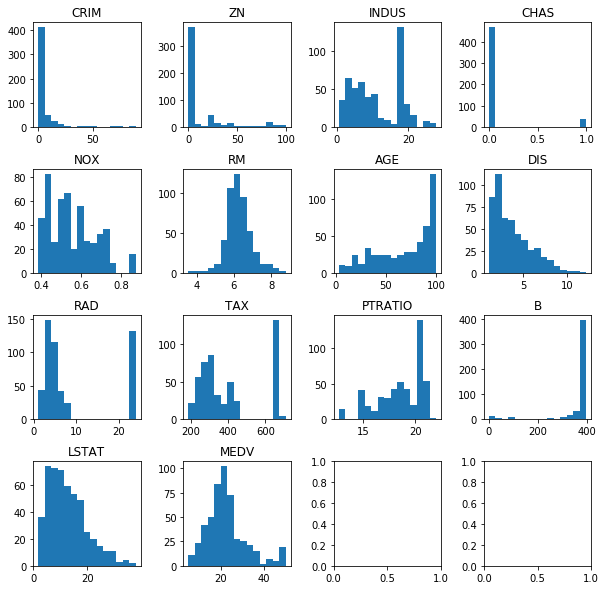

In [9]:
#plot histograms 
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Iterate through the subplots and plot the histograms
for i in range(4):
    for j in range(4):
        column_index = i * 4 + j
        # check if the column index exceeds the number of columns
        if column_index >= len(dataset.columns):
            break
        axs[i, j].hist(dataset.iloc[:, column_index], bins=15)
        axs[i, j].set_title(f'{dataset.columns[column_index]}')

plt.show()

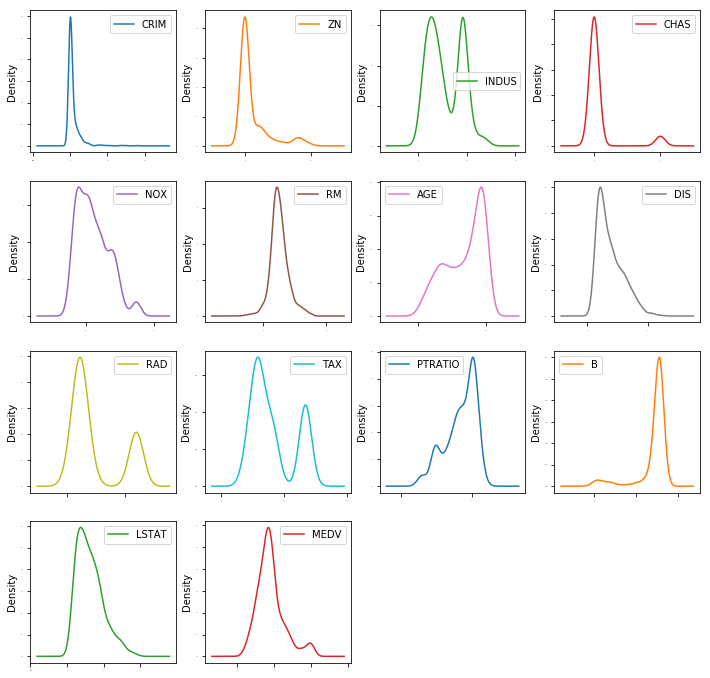

In [10]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(12,12))
plt.show()

We can see that some attributes may follows a distribution:
- RM, MEDV: normal

- NOX, LSTAT: skewed gaussian

- CRIM, DIS, ZN, AGE, B: exponential

- RAD, TAX: bimodal

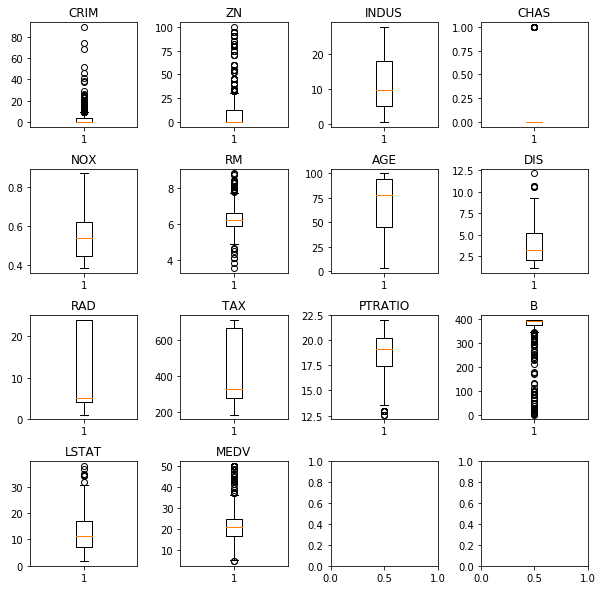

In [11]:
#plot boxplot 
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Iterate through the subplots and plot the histograms
for i in range(4):
    for j in range(4):
        column_index = i * 4 + j
        # check if the column index exceeds the number of columns
        if column_index >= len(dataset.columns):
            break
        axs[i, j].boxplot(dataset.iloc[:, column_index])
        axs[i, j].set_title(f'{dataset.columns[column_index]}')

plt.show()

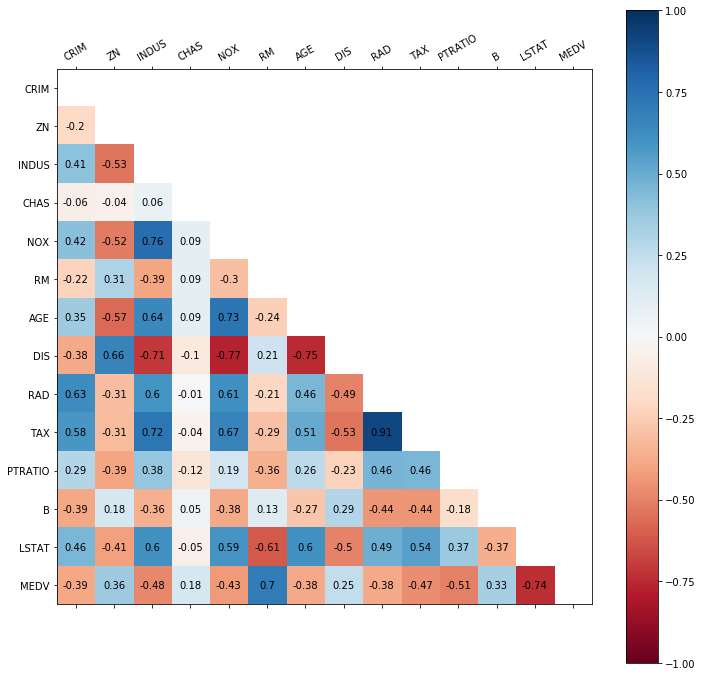

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ZN,-0.20,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
INDUS,0.41,-0.53,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CHAS,-0.06,-0.04,0.06,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
NOX,0.42,-0.52,0.76,0.09,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
RM,-0.22,0.31,-0.39,0.09,-0.30,nan,nan,nan,nan,nan,nan,nan,nan,nan
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,nan,nan,nan,nan,nan,nan,nan,nan
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,nan,nan,nan,nan,nan,nan,nan
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,nan,nan,nan,nan,nan,nan
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,nan,nan,nan,nan,nan


In [12]:
# plot correlation matrix
correlations = dataset.corr()
col_length = len(correlations.columns)

# modifying it to only include values below the diagonal
ones = np.ones(correlations.shape) # return a new array filled with ones of a given shape and type
mask = np.tril(ones, k=-1).astype(np.bool) # lower triangle of an array + substitute 0 for False
new_correlations = correlations.where(mask) # replace values where the condition is False

# ploting
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
cax = ax.matshow(new_correlations, cmap='RdBu', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, col_length, 1)

# Loop over data dimensions and create text annotations
for i in range(col_length):
    for j in range(col_length):
        # Add text annotation only where mask is True (non-zero)
        if mask[i, j] == True:
            text = ax.text(j, i, round(new_correlations.to_numpy()[i, j], 2),
                    ha="center", va="center", color="black")

ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns, rotation=30)
ax.set_yticklabels(dataset.columns)
plt.show()

new_correlations

### 3. Prepare Data

#### a) Data Cleaning

In [13]:
# for this dataset, we don't need to do it

#### b) Feature Selection

In [14]:
# for this dataset, we don't need to do it

#### c) Data Transform

In [15]:
# for this dataset, we don't need to do it

### 4. Evaluate Algorithms

#### a) Split-out validation dataset

In [16]:
# Split-out validation dataset

array = dataset.values
col_length = len(dataset.columns) -1

X = array[:,0:col_length]
Y = array[:,col_length]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#### b) Test options and evaluation metric

In [17]:
# Test options and evaluation metric

# we will use 10-fold cross validation to estimate accuracy
# split our dataset into 10 parts, train 9 and test on 1 and repeat for all combionations of train-test splits
n_splits = 10

# we are using the metric of MSE (mean squared error)
# MSE will give a gross idea of how wrong all predictions are (0 is perfect)
scoring = 'neg_mean_squared_error'

#### c) Spot check Algorithms

In [141]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR(gamma='scale')))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=n_splits, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -25.054616 (13.000373)
SVR: -67.827886 (29.049138)


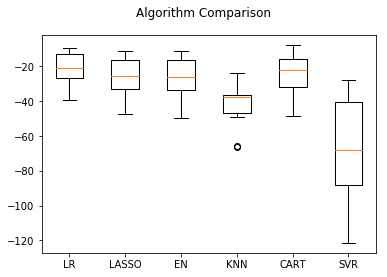

In [142]:
# compare algorithms

#plot boxplot
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see similiar ditributions for linear regression algorithm and perhaps a tighter distribution of scores for CART.

The differing scales of the data is probably hurting the skill of all of the algorithms and perfarps more so for SVR and KNN. We will run the same algorithms using a standardized dataset (removing the mean and scaling to unit variance).

To avoid leakage, we will use  pipelines that standardize the data and build the model for each fold in the cross validation test.

In [143]:
# Standardize the dataset

pipelines = []
pipelines.append(('Scaled_LR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('Scaled_LASSO', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
pipelines.append(('Scaled_EN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
pipelines.append(('Scaled_KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('Scaled_CART', Pipeline([('Scaler', StandardScaler()), ('CARTLR', DecisionTreeRegressor())])))
pipelines.append(('Scaled_SVR', Pipeline([('Scaler', StandardScaler()), ('SVR', SVR(gamma='scale'))])))

# evaluate each model in turn
#results = []
#names = []

for name, model in pipelines:
    kfold = KFold(n_splits=n_splits, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Scaled_LR: -21.379856 (9.414264)
Scaled_LASSO: -26.607314 (8.978761)
Scaled_EN: -27.932372 (10.587490)
Scaled_KNN: -20.107620 (12.376949)
Scaled_CART: -23.361310 (10.035159)
Scaled_SVR: -29.633086 (17.009186)


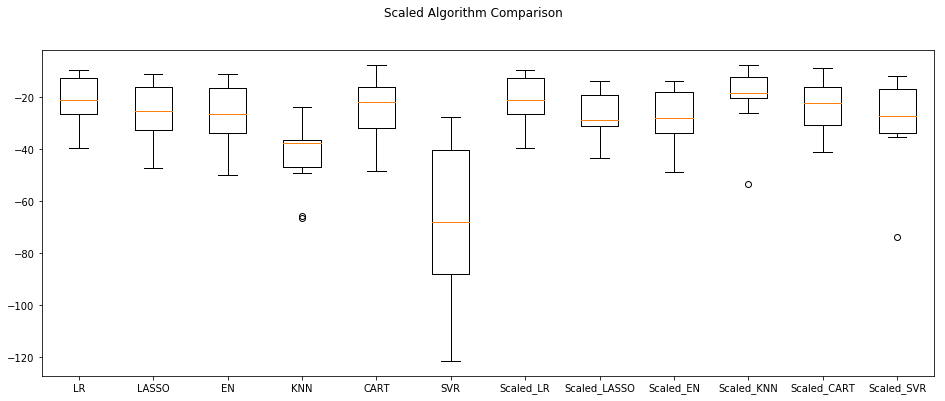

In [144]:
# compare algorithms

# plot boxplot
fig = plt.figure(figsize=(16, 6))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see that scaling had an effect on nonlinear regression algorithms. Mainly KNN, lowering the error more than the other models. So KNN has both tight distribution of error and has the better score (nearest 0)

A curious point is that linear regressions provide the same value or changed very little. This is because regression is based on correlation, which are invariant to linear transformations.



### 5. Improve Accuracy

#### a) Algorithm Tuning

We know from the results in the previous section that KNN achieves good results on a scaled version of dataset. But we can do better.

The default value for number of neighbors in KNN is 7. We can use a grid search to try a set of different numbers of neighbors and see if we can improve the score.

The below example tries k values from 1 to 21, and arbitrary range covering a known good value of 7. Each k value (n.neighbors) is evaluated using 10-fold cross validation on a standardized copy of the training dataset.

In [145]:
# KNN Algorithm tuning

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.arange(1, 22, dtype=int)
param_grid = dict(n_neighbors=k_values)

model = KNeighborsRegressor()
kfold = KFold(n_splits=n_splits, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, iid=False)
grid_result = grid.fit(rescaledX, Y_train)

# i cannot find which value for iid parameter is better (If True, the data is assumed to be identically distributed across the folds)

In [146]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.109304 using {'n_neighbors': 3}
-20.169640 (14.986904) with: {'n_neighbors': 1}
-19.089827 (12.789176) with: {'n_neighbors': 2}
-18.109304 (12.880861) with: {'n_neighbors': 3}
-19.833650 (12.744481) with: {'n_neighbors': 4}
-20.063115 (12.138331) with: {'n_neighbors': 5}
-20.525311 (12.221622) with: {'n_neighbors': 6}
-20.514297 (12.278136) with: {'n_neighbors': 7}
-20.194913 (12.032442) with: {'n_neighbors': 8}
-20.319536 (11.554509) with: {'n_neighbors': 9}
-20.705668 (11.583814) with: {'n_neighbors': 10}
-20.963145 (11.540907) with: {'n_neighbors': 11}
-20.897796 (11.456129) with: {'n_neighbors': 12}
-21.099040 (11.870962) with: {'n_neighbors': 13}
-21.428720 (11.897832) with: {'n_neighbors': 14}
-21.506843 (11.468311) with: {'n_neighbors': 15}
-22.274804 (11.666059) with: {'n_neighbors': 16}
-22.739137 (11.499596) with: {'n_neighbors': 17}
-23.357912 (11.453736) with: {'n_neighbors': 18}
-23.829011 (11.277558) with: {'n_neighbors': 19}
-24.187867 (11.661136) with: {'n_nei

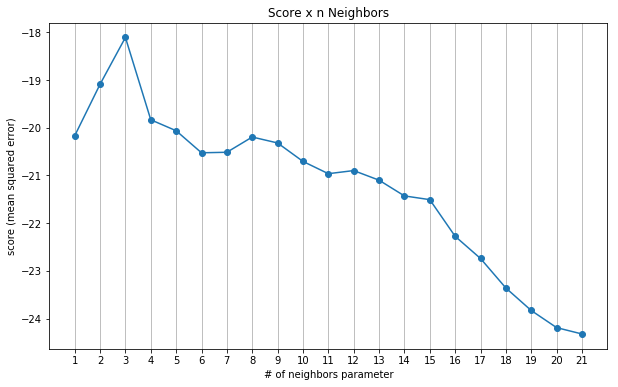

In [147]:
# Extracting the 'n_neighbors' values from each dictionary
x_values = [d['n_neighbors'] for d in params]

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Score x n Neighbors')
plt.plot(x_values, means, marker='o')
plt.grid(axis='x')
plt.xticks(np.arange(1, 22, 1))
plt.ylabel('score (mean squared error)')
plt.xlabel('# of neighbors parameter')
plt.show()

We can see that the best for k (n_neighbors) is 3 providing a mean squared error of -18.17, the best so far

#### b) Ensembles

Another way to improve the performance of algorithms is using ensemble methods. We will evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods:

- Boosting Methods: AdaBoost (AB), Gradient Boosting (GBM)
- Bagging Methods: Random Forests (RF) and Extra Trees (ET)

scKNN_AB: -15.075939 (6.666233)
scKNNS_GBM: -15.067553 (6.860205)
scKNN_RF: -15.084611 (6.660586)
scKNNS_ET: -15.254068 (7.501125)


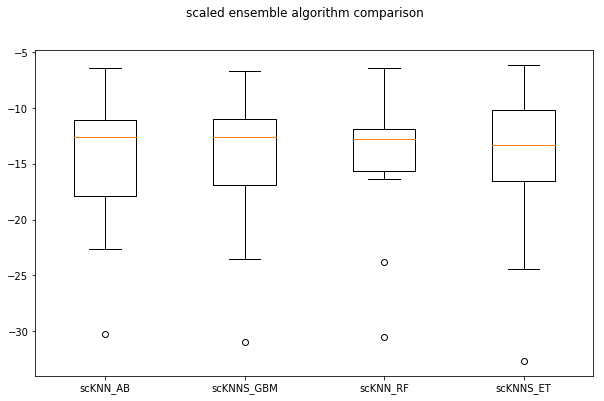

In [153]:
# ensembles

ensembles = []

ensembles.append(('scKNN_AB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])))
ensembles.append(('scKNNS_GBM', Pipeline([('Scaler', StandardScaler()), ('GBM', AdaBoostRegressor())])))
ensembles.append(('scKNN_RF', Pipeline([('Scaler', StandardScaler()), ('RF', AdaBoostRegressor())])))
ensembles.append(('scKNNS_ET', Pipeline([('Scaler', StandardScaler()), ('ET', AdaBoostRegressor())])))

results_knn = []
names_knn = []

for name, model in ensembles:
    kfold = KFold(n_splits=n_splits, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    results_knn.append(cv_results)
    names.append(name)
    names_knn.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


# compare graphically algorithms
fig = plt.figure(figsize=(10,6))
fig.suptitle('scaled ensemble algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_knn)
ax.set_xticklabels(names_knn)
plt.show()

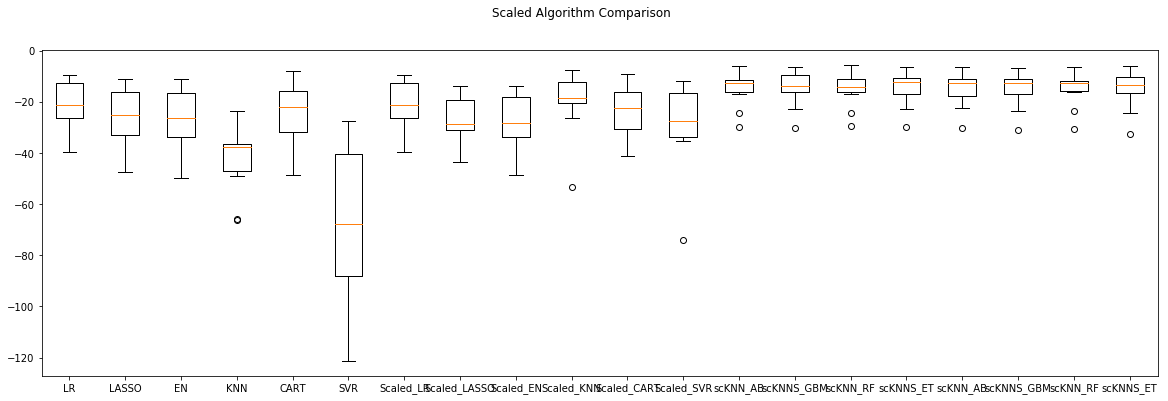

In [154]:
# Extracting the 'n_neighbors' values from each dictionary
x_values = [d['n_neighbors'] for d in params]

# plot boxplot
fig = plt.figure(figsize=(20, 6))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see that we are generally getting better scores than our linear and nonlinear algorithms in previous sections.

For our problem, Gradient Boosting has better mean score. We will look at tuning the Gradient Boosting parameters. The default number of boosting stages to perform (n.estimators) is 100.

The larger the number of boosting stages, the better the performance but the longer the training time.

Below we define a parameter grid n.estimators values from 50 to 500 in increments of 50. Each setting is evaluated using 10-fold cross validation

In [164]:
# Tune scaled GBM

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.arange(50, 501, 50))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=n_splits, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, iid=False)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -9.331355 using {'n_estimators': 500}


In [165]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-10.794196 (4.711473) with: {'n_estimators': 50}
-10.023378 (4.430026) with: {'n_estimators': 100}
-9.677606 (4.264721) with: {'n_estimators': 150}
-9.523458 (4.258585) with: {'n_estimators': 200}
-9.433037 (4.250207) with: {'n_estimators': 250}
-9.411274 (4.259832) with: {'n_estimators': 300}
-9.350389 (4.239830) with: {'n_estimators': 350}
-9.337334 (4.253706) with: {'n_estimators': 400}
-9.332080 (4.266245) with: {'n_estimators': 450}
-9.331355 (4.290838) with: {'n_estimators': 500}


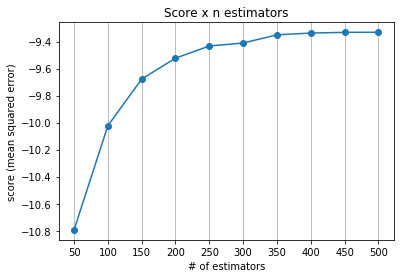

In [169]:
# Extracting the 'n_neighbors' values from each dictionary
x_values = [d['n_estimators'] for d in params]

# Plotting
plt.figure(figsize=(6, 4))
plt.title('Score x n estimators')
plt.plot(x_values, means, marker='o')
plt.grid(axis='x')
plt.xticks(np.arange(50, 501, 50))
plt.ylabel('score (mean squared error)')
plt.xlabel('# of estimators')
plt.show()

We can see that the best configuration was n_estimators=500 resulting in a mean squared error of -9.331355, about 0.65 units better than the untuned method (n_estimators=100)

### 6. Finalize Model

#### a) Predictions on validation dataset

In [171]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=500)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=7, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [172]:
# transform the validation dataset

rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.988327673779764


We can see that the estimated mean squared error is 11.8, close to our estimate of -9.3

#### b) Summary

- Dataset: Boston house price data

- Analyze Data: some skewed distributions and correlated attributes

- Evaluate Algorithms: linear regression looked good

- Evaluate Algorithms with standardization: KNN looked good

- Algorithm Tuning: K=3 for KNN was best

- Ensemble Methods: Bagging and Boosting, Gradient Boosting looked good

- Tuning Ensemble Methods: getting the most from Gradient Boosting

- Finalize Model: use all training data and confirm using validation dataset